In [1]:
import numpy as np
from PIL import Image
import math
import random
import sys, getopt
from scipy.fft import fft2, fftfreq, fftshift, ifft2
from scipy import fftpack, ndimage
from matplotlib import pyplot as plt
import cmath
from scipy.signal import convolve2d
from matplotlib.pyplot import imread
import os

In [2]:
def M(x, y):
    if(x**2 + y**2 < (math.pi/2)**2):
        return 1
    else:
        return 0

In [3]:
def p_s(x, y, delta_z):
    return 0.375 * delta_z * math.pi * (x**2 + y**2)

In [4]:
def p(x, y):
    return 0.5 * math.pi * (x**2 + y**2)

In [5]:
def h(delta_z):  # создает матрицу для фильтра нужной нам размерности (h)
# от сигма зависит степень размытия. чем больше сигма тем больше размытие
    
    matr = np.zeros(shape = (512,512), dtype = np.complex128) # матрица из 0 (по размеру изборжания подаваемого)
                                          
    #|F(M(x,y)∙exp{i∙p_s (x,y,∆z_nm )+i∙p(x,y)})|
    
    #p_s = 0.375* math.pi * (разность между слоями) * (x**2 + y**2) 
     
    for i in range(matr.shape[0]):
        for j in range(matr.shape[1]):
            x = math.pi/511*(i-255)
            y = math.pi/511*(j-255)
            matr[i, j] = M(x,y) * cmath.exp(1j * p_s(x, y, delta_z) + 1j * p(x, y))
            
    return abs(fftshift(fft2(matr)))

In [43]:
def read_pics(filename, number_of_pics):
    N = number_of_pics
    pics = [0] * number_of_pics
    
    for i in range(number_of_pics):
        im = Image.open(((os.path.abspath(os.curdir))+ '/pics/' + filename[i]),'r')
        data = np.array(im)                         #представляем как массив
        data_im_fl = data[:,:,0].astype(np.float)
        #plt.imshow(data_im_fl)
        #plt.show()
        im_f_n = np.zeros(shape = (1024,1024), dtype = complex)
        im_f_n[0:512,0:512] = data_im_fl            #расширяем
        im_f_n = fftshift(fft2(im_f_n))             #применяем ПФ
        pics[i] += im_f_n
    return pics

['src_0004.png', 'src_0005.png', 'src_0002.png', 'src_0003.png', 'src_0001.png', 'src_0000.png']
['src_0000.png', 'src_0001.png', 'src_0002.png', 'src_0003.png', 'src_0004.png', 'src_0005.png']
6
<class 'list'>
<class 'list'>


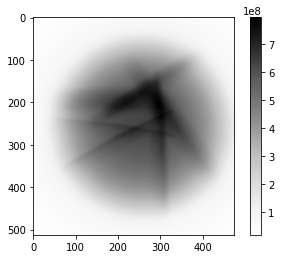

In [49]:
%matplotlib inline
#зубочистка

dir_pics = os.listdir(path = ((os.path.abspath(os.curdir))+'/pics/'))
dir_pics.sort()

pics = read_pics(dir_pics, len(dir_pics))
three = [0] * len(pics)
final = [0] * len(pics)


k = len(pics)
mas_of_h = [0] * (2*k-1)
print(type(mas_of_h))

#считаем h [-кол-во_изобр, +кол-во_изобр]
for i in range (-len(pics)+1, len(pics)):
    h_f_n = np.zeros(shape = (1024,1024), dtype = complex)
    h_f_n[0:512, 0:512] = h(delta_z = math.pi * i)
    mas_of_h[i+len(pics)-1] += fftshift(fft2(h_f_n))
    

for m in range(len(pics)):
    for n in range(len(pics)):
        three[n] = abs(ifft2(pics[n] * mas_of_h[n-m+len(pics)-1])) 
    final[m] = three[0] + three[1] + three[2] + three[3] + three[4] + three[5]#* delta_z
    final[m] /= len(pics)
    

print(type(final))

plt.imshow(final[5][255:768,255:728], cmap = "Greys")
plt.colorbar()
